<a href="https://colab.research.google.com/github/RyutoYoda/Word-Play-Test/blob/main/Word_Play_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install janome

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 80.3 MB/s eta 0:00:00


In [2]:
!apt-get -qq -y install fonts-ipafont-gothic

Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 123069 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ipafont-mincho.
Preparing to unpack .../fonts-ipafont-mincho_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-mincho (00303-18ubuntu1) ...
Setting up fonts-ipafont-mincho (00303-18ubuntu1) ...
update-alternatives: using /usr/share/fonts/opentype/ipafont-mincho/ipam.ttf to provide /usr/share/fonts/truetype/fonts-japanese-mincho.ttf (fonts-japanese-mincho.ttf) in auto mode
Setting up fonts-ipafont-gothic (00303-18ubuntu1) ...
update-alternatives: using /usr/share/fonts/opentype/ipafont-gothic/ipag.ttf to provide /usr/share/fonts/truetype/fonts-japanese-gothic.ttf (fonts-japanese-gothic.ttf) in auto mode
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [3]:
!pip install unidic-lite
!pip install unidic-lite
!pip install mecab-python3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658818 sha256=f3053e317975b94b3bac1521cd21c18157334ce0ba6b0ba4c8b6a89772064926
  Stored in directory: /root/.cache/pip/wheels/89/e8/68/f9ac36b8cc6c8b3c96888cd57434abed96595d444f42243853
Successfully built unidic-lite
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.6/581.6 kB 36.7 MB/s eta 0:00:00


In [4]:
pip install nlplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.9/967.9 kB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.3 MB/s eta 0:00:00


In [5]:
pip install wordcloud

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [65]:
import pandas as pd
import itertools

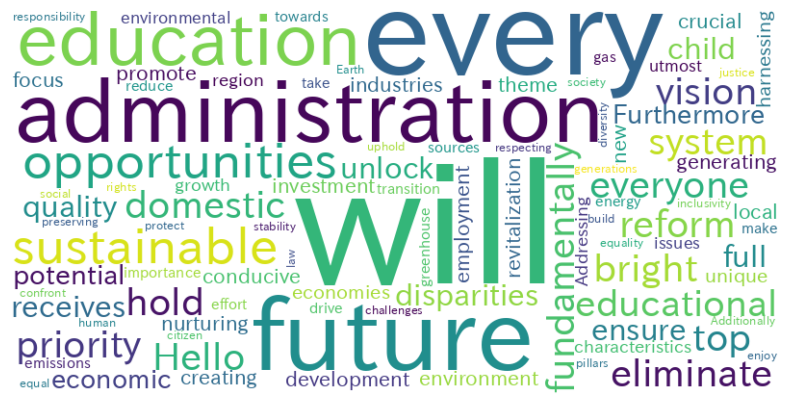

In [66]:
# フォントのパスを指定
font_path = '/usr/share/fonts/truetype/ipafont-gothic/ipagp.ttf'
wc = WordCloud(font_path=font_path, width=800, height=400, background_color='white')

# 架空有権者ジョンの政見放送
data = '''
Hello, everyone. I hold a bright vision for the future. Under my administration, our top priority will be to fundamentally reform the domestic education system and eliminate educational disparities. We will ensure that every child receives a quality education and unlock their full potential.
Furthermore, economic development is a crucial theme. I will focus on creating a conducive investment environment, nurturing new industries, and generating employment opportunities. We will also promote the revitalization of local economies, harnessing the unique characteristics of each region for sustainable growth.
Addressing environmental issues is of utmost importance. We will drive the transition towards sustainable energy sources and make every effort to reduce greenhouse gas emissions. We take responsibility for preserving the Earth for future generations.
Additionally, social stability and justice will be the pillars of my administration. We will uphold equality under the law and protect human rights, while respecting diversity and inclusivity. We confront challenges to build a society where every citizen can enjoy equal opportunities.
'''
wordcloud = wc.generate(data)

# プロットの設定
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29694 (\N{CJK UNIFIED IDEOGRAPH-73FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21336 (\N{CJK UNIFIED IDEOGRAPH-5358}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

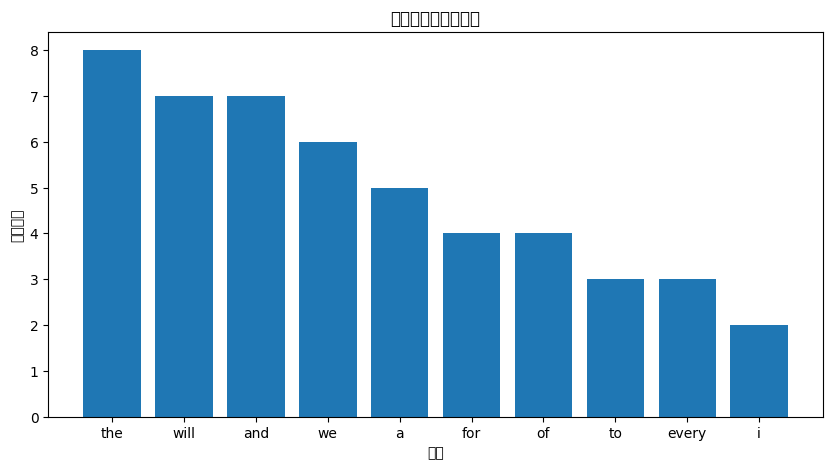

In [64]:
# 単語のカウント
words = data.lower().split()
word_counts = Counter(words)

# 頻出単語の取得
top_words = word_counts.most_common(10)  # 上位10件の単語を取得

# データの分割
words, counts = zip(*top_words)

# 棒グラフのプロット
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xlabel('単語')
plt.ylabel('出現頻度')
plt.title('頻出単語の棒グラフ')
plt.show()

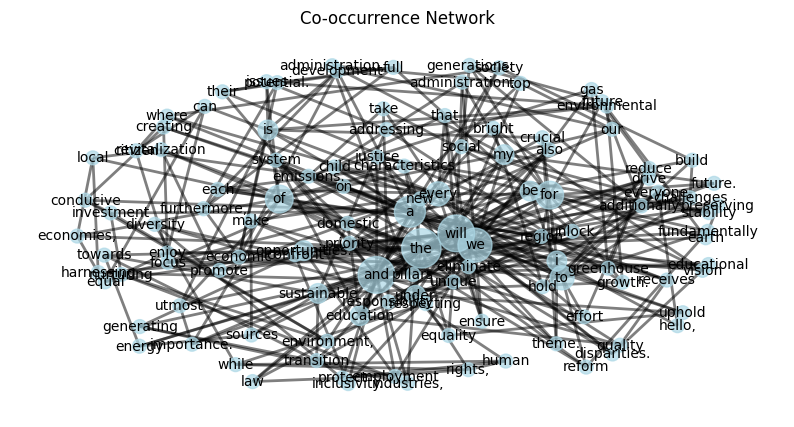

In [63]:
# 単語のカウント
words = data.lower().split()
word_counts = Counter(words)

# 共起関係の抽出
coocurrences = {}
window_size = 2  # 共起する単語の最大距離
for i in range(len(words)):
    for j in range(i + 1, min(i + window_size + 1, len(words))):
        word_pair = (words[i], words[j])
        coocurrences[word_pair] = coocurrences.get(word_pair, 0) + 1

# 共起ネットワークの作成
G = nx.Graph()
for word_pair, weight in coocurrences.items():
    word1, word2 = word_pair
        # 単語の出現頻度を取得
    word1_count = word_counts[word1]
    word2_count = word_counts[word2]

    # 共起ネットワークに単語とエッジを追加
    G.add_edge(word1, word2, weight=weight, frequency=weight/(word1_count + word2_count))

# 共起ネットワークの描画
plt.figure(figsize=(10, 5))
pos = nx.spring_layout(G, k=1)  # レイアウトの設定

edge_width = [d['weight'] * 2 for (u, v, d) in G.edges(data=True)]  # エッジの太さを設定
node_size = [word_counts[node] * 100 for node in G.nodes()]  # ノードのサイズを設定

# ノード
node_colors = [np.random.choice(range(200), size=1) for _ in range(len(G.nodes()))]

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='lightblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=edge_width, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.title('Co-occurrence Network')
plt.show()